In [2]:
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import pandas as pd
import seaborn as sb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [3]:
filename = '/content/drive/MyDrive/Colab Notebooks/Pattern Recognition/Final/Mall_Customers.csv'
dataset = read_csv(filename)

In [4]:
print(dataset.shape)

(200, 5)


In [ ]:
print(dataset.head(20))
set_option('display.width', 350)

    CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Female  Male
0            1   19                  15                      39       0     1
1            2   21                  15                      81       0     1
2            3   20                  16                       6       1     0
3            4   23                  16                      77       1     0
4            5   31                  17                      40       1     0
5            6   22                  17                      76       1     0
6            7   35                  18                       6       1     0
7            8   23                  18                      94       1     0
8            9   64                  19                       3       0     1
9           10   30                  19                      72       1     0
10          11   67                  19                      14       0     1
11          12   35                  19                      99 

In [5]:
print(dataset.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [6]:
print ( dataset.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
dataset = pd.DataFrame(dataset)

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(dataset['Gender'])

# Concatenate one-hot encoded columns with the original DataFrame
dataset_encoded = pd.concat([dataset, one_hot_encoded], axis=1)

# Drop the original 'gender' column
dataset_encoded.drop('Gender', axis=1, inplace=True)

dataset= dataset_encoded.copy()
dataset.head()




,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [8]:
set_option('display.width', 150)
set_option('display.precision', 2)
correlations = dataset.corr(method='pearson')
print(correlations)

                        CustomerID   Age  Annual Income (k$)  Spending Score (1-100)  Female  Male
CustomerID                    1.00 -0.03            9.78e-01                1.38e-02   -0.06  0.06
Age                          -0.03  1.00           -1.24e-02               -3.27e-01   -0.06  0.06
Annual Income (k$)            0.98 -0.01            1.00e+00                9.90e-03   -0.06  0.06
Spending Score (1-100)        0.01 -0.33            9.90e-03                1.00e+00    0.06 -0.06
Female                       -0.06 -0.06           -5.64e-02                5.81e-02    1.00 -1.00
Male                          0.06  0.06            5.64e-02               -5.81e-02   -1.00  1.00


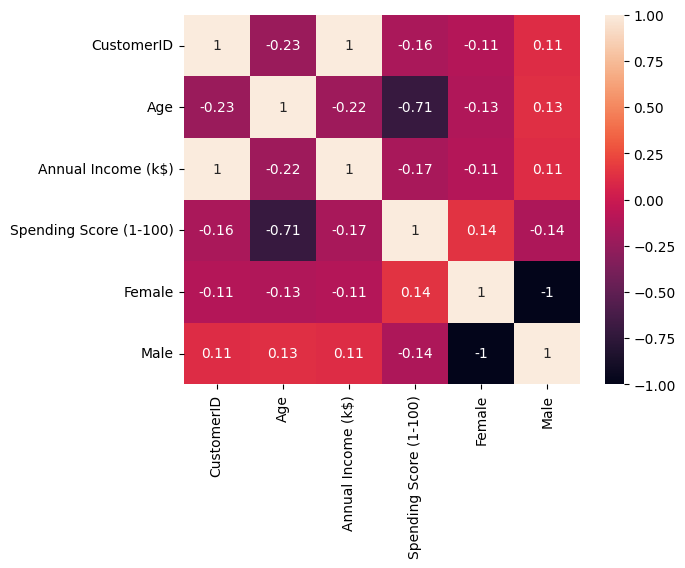

<Figure size 10000x10000 with 0 Axes>

In [9]:
# Create a correlation matrix
corr = correlations.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True)
plt.figure(figsize=(100,100))
plt.show()

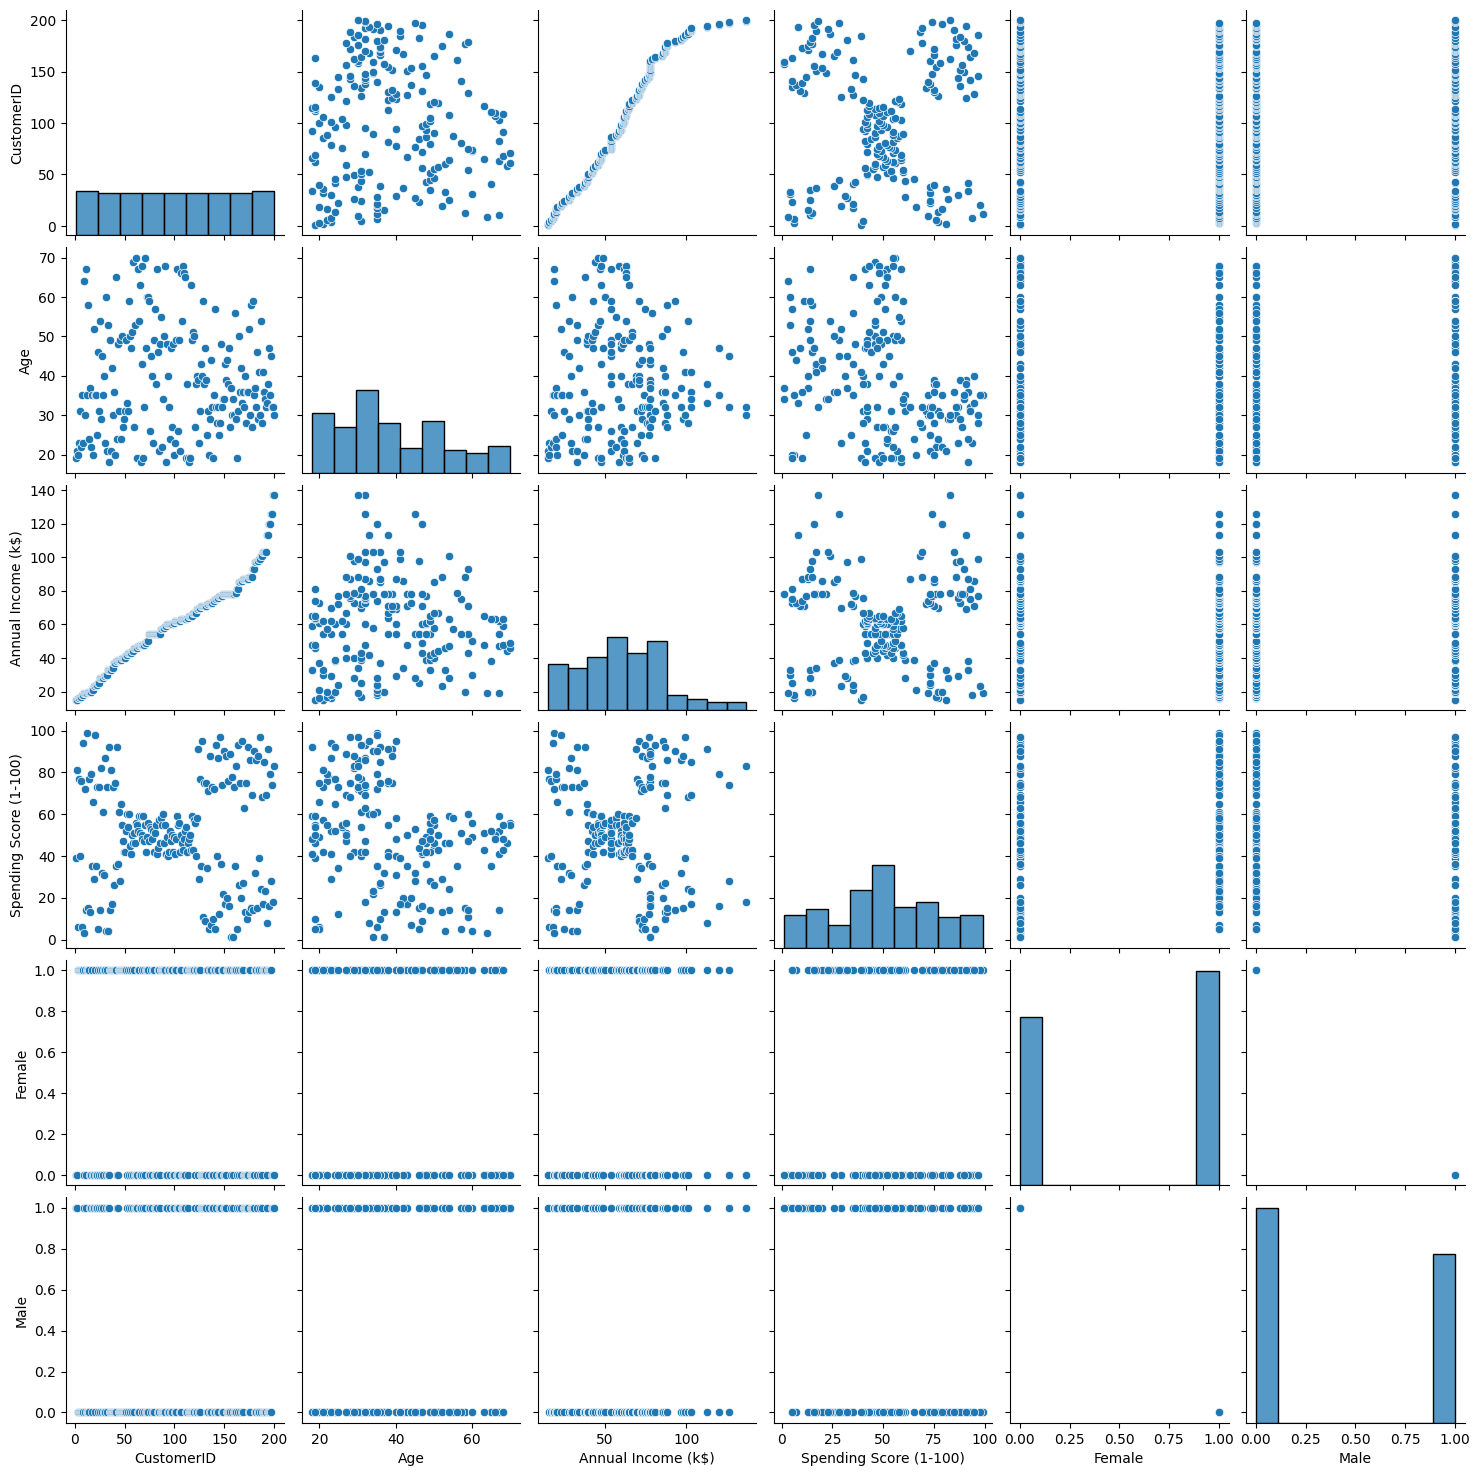

In [10]:
import seaborn as sns
sns.pairplot(dataset)

In [11]:
x=dataset.iloc[:,[2,3]]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [12]:
k_range=range(1,11)


In [13]:
from sklearn.cluster import KMeans

wcss = []  # List to store the within-cluster sum of squares

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


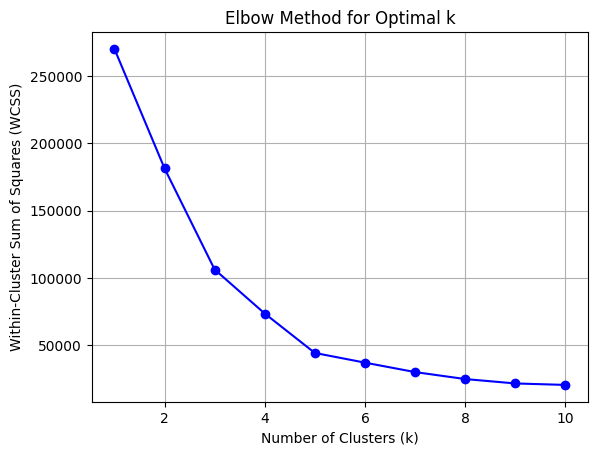

In [14]:
# Plotting the WCSS values against k
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming x is your data
# Range of clusters to try
k_range = range(2, 11)
wcss = []
silhouette_scores = []

# Iterate over each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(x)
    # Compute the within-cluster sum of squares
    wcss.append(kmeans.inertia_)
    # Compute silhouette score
    silhouette_scores.append(silhouette_score(x, kmeans.labels_))

# Print WCSS and silhouette scores
print("WCSS:", wcss)
print("Silhouette Scores:", silhouette_scores)

WCSS: [183702.5745614035, 106397.21385076201, 73728.62329226076, 44497.18546815503, 37282.493602549366, 30289.21571091452, 25077.06714060552, 22900.079626833118, 19697.39209894878]
Silhouette Scores: [0.39545585408755346, 0.46733000902034116, 0.49281793644822175, 0.5534496268497305, 0.5392287389831614, 0.5282336682863855, 0.4549600442431898, 0.4468533434180529, 0.4485764617792217]


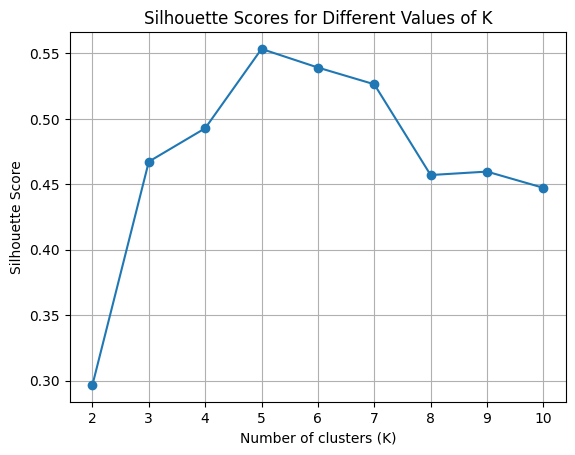

Silhouette Score for k=5: 0.5534496268497305


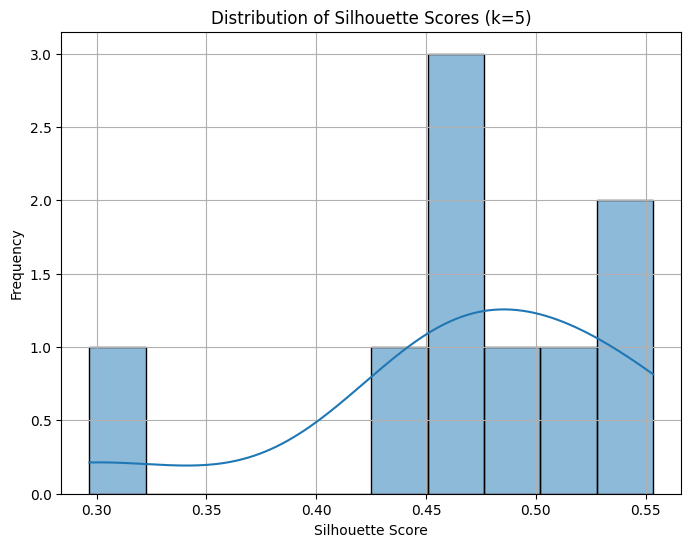

In [36]:
import matplotlib.pyplot as plt

# Plot silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming x is your data
k = 5

# Initialize KMeans with 5 clusters
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(x)

# Compute silhouette score
silhouette_avg = silhouette_score(x, kmeans.labels_)

print("Silhouette Score for k=5:", silhouette_avg)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(silhouette_scores, bins=10, kde=True)
plt.title('Distribution of Silhouette Scores (k=5)')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [19]:
from sklearn.metrics import calinski_harabasz_score

score = calinski_harabasz_score(dataset, y_kmeans)
print('Calinski-Harabasz score: %.3f' % score)

Calinski-Harabasz score: 260.769


In [20]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(dataset, y_kmeans)
print('Davies-Bouldin score: %.3f' % score)

Davies-Bouldin score: 0.858


In [21]:
from sklearn.feature_selection import mutual_info_classif

x = dataset.iloc[:, 2:5]  # select relevant features
y = dataset['Spending Score (1-100)']  # target variable

mutual_information = mutual_info_classif(x, y)

# Print the mutual information scores
for i, feature in enumerate(x.columns):
    print(f"Mutual information for '{feature}': {mutual_information[i]}")


Mutual information for 'Annual Income (k$)': 0.4995817115035397
Mutual information for 'Spending Score (1-100)': 3.514219920184028
Mutual information for 'Female': 0.7851814810445905
